# IMPORTS

In [1]:
import pandas as pd
import numpy as np

from IPython.display import set_matplotlib_formats

import matplotlib.pyplot as plt
from matplotlib import rcParams

import matplotlib.cm as cm

# LOAD DATA

In [2]:
# replace "benzene_NICSzz.txt" and "benzene_atoms.txt" with the actual file names: 

NICS2D_file = "benzene_NICSzz.txt"
coord_file = "benzene_atoms.txt"

# PLOT

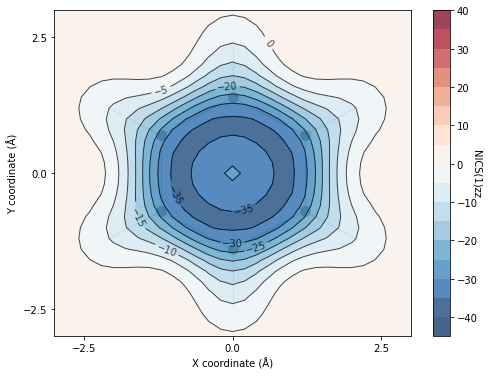

<Figure size 576x432 with 0 Axes>

In [4]:
contour_data = pd.read_csv(NICS2D_file, delimiter='\t ', engine='python')
coord = pd.read_csv(coord_file, delimiter=',')

Z = contour_data.pivot_table(index='x', columns='y', values='NICS').T.values

X_unique = np.sort(contour_data.x.unique())
Y_unique = np.sort(contour_data.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)


rcParams['figure.figsize'] = 8, 6 #Plot size
fig = plt.figure()
ax = fig.add_subplot(111)

levels = np.array(range(-45,30,5)) #Defining the contour levels
#cpf = ax.contourf(X,Y,Z, len(levels), cmap=cm.RdBu_r, vmin=-40, vmax=40) #Color map for the contour levels
cpf = ax.contourf(X,Y,Z, range(-45,41,5), cmap=cm.RdBu_r, vmin=-40, vmax=40, alpha=0.75, zorder=2) #Color map for the contour levels
line_colors = ['black' for l in cpf.levels] #Defining line colors
cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors, alpha=0.7, linewidths=1) #Plot lines
ax.clabel(cp, fontsize=10, colors=line_colors) #Contour labels 

plt.xticks([-5,-2.5,0,2.5,5]) 
plt.yticks([-5,-2.5,0,2.5,5])
ax.set_xlabel('X coordinate (Å)')
_ = ax.set_ylabel('Y coordinate (Å)')

cbar = plt.colorbar(cpf,cmap=cm.RdBu_r,shrink=1) #Plot Bar
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('NICS(1)zz', rotation=270,fontsize=10)

#BONDS - START

import math
def bond_distance(i,j):
    return math.sqrt((j[1]-i[1])**2 + (j[2]-i[2])**2)

atoms_1x = []
atoms_1y = []
atoms_2x = []
atoms_2y = []

for k, i in enumerate(coord.index):
    for j in coord.index[k:]:
        if 0 < bond_distance(coord.loc[i],coord.loc[j]) < 1.6:
            atoms_1x += [coord.loc[i].iat[1]]
            atoms_1y += [coord.loc[i].iat[2]]
            atoms_2x += [coord.loc[j].iat[1]]
            atoms_2y += [coord.loc[j].iat[2]]

def connectpoints(x,y,p1,p2):
    x1, x2 = atoms_1x[i], atoms_2x[i]
    y1, y2 = atoms_1y[i], atoms_2y[i]
    plt.plot([x1,x2],[y1,y2],marker='None',linewidth=1,color='silver',alpha=1,zorder=1)
for i in range(0,len(atoms_1x)):
    connectpoints(i,i,i,i)

#BONDS - END

#ATOMS - START

C_x = []
C_y = []
H_x = []
H_y = []

for i in coord.index:
    if "C" in coord.loc[i].iat[0]:
        C_x.append(coord.loc[i].iat[1])
        C_y.append(coord.loc[i].iat[2])
    elif "H" in coord.loc[i].iat[0]:
        H_x.append(coord.loc[i].iat[1])
        H_y.append(coord.loc[i].iat[2])

plt.plot(C_x,C_y,marker='o',markersize="10",linewidth=0,color='grey',alpha=1,zorder=1)
plt.plot(H_x,H_y,marker='o',markersize="5",linewidth=0,color='seashell',alpha=1,zorder=1)

#ATOMS - END

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('benzene.png', dpi=300)